In [10]:
import folium
from config import vworld_key
import pandas as pd

df = pd.read_csv('D:\\1_SW2\\data\\17_21_이륜차_사고다발지역(좌표o).csv', header = 0,engine = 'python', encoding='cp949', index_col=0)

lat = df['위도'].values.tolist()
lon = df['경도'].values.tolist()
zoom_size = 17

layer = "Satellite"
tileType = "jpeg"
tiles = f"http://api.vworld.kr/req/wmts/1.0.0/{vworld_key}/{layer}/{{z}}/{{y}}/{{x}}.{tileType}"
attr = "Vworld"

image_idx = 180

In [11]:
def center_crop(img, set_size):
    
    h, w, c= img.shape

    if set_size > min(h, w):
        return img

    crop_width = set_size
    crop_height = set_size

    mid_x, mid_y = w//2, h//2
    offset_x, offset_y = crop_width//2, crop_height//2
       
    crop_img = img[mid_y - offset_y:mid_y + offset_y, mid_x - offset_x:mid_x + offset_x]
    return crop_img

In [12]:
from IPython.display import IFrame

m = folium.Map(
    location=[lat[image_idx], lon[image_idx]],
        # tiles=tiles,
    # attr=attr,
    zoom_start=zoom_size
)

# folium.TileLayer(
#     tiles=tiles,
#     attr=attr,
#     overlay=True,
#     control=True
# ).add_to(m)

filepath = "graph.html"
m.save(filepath)
from selenium import webdriver
from selenium.webdriver import FirefoxOptions
img = m._to_png(1)
from PIL import Image
import io
import cv2
# img = cv2.imread(io.BytesIO(img))
import numpy as np
img = np.fromstring(img, dtype = np.uint8)
img = cv2.imdecode(img, cv2.IMREAD_COLOR)

size  = 210

img2 = center_crop(img, size)

# import os
# import time
# mapUrl = 'file://{0}/{1}'.format(os.getcwd(), filepath)
# opts = FirefoxOptions()
# opts.add_argument(f'--width=400')
# opts.add_argument(f'--height=400')

# driver = webdriver.Firefox(options=opts)
# driver.implicitly_wait(5)
# driver.get(mapUrl)
# driver.save_screenshot(f'tmp.png')
# driver.quit()

from matplotlib import pyplot as plt
img_ = cv2.imread(f'D:\\1_SW2\\data\\accident_80\\images\\{image_idx}.png')

C:\Users\No\AppData\Local\Temp\ipykernel_37944\204090848.py:27: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  img = np.fromstring(img, dtype = np.uint8)


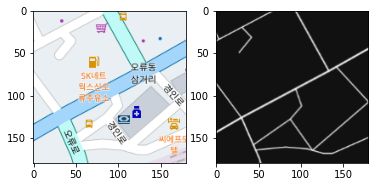

In [14]:
size  = 180

img2 = center_crop(img, size)
img_ = cv2.resize(img_, (size, size))

f, axarr = plt.subplots(1,2) 
axarr[0].imshow(img2)
axarr[1].imshow(img_)